# Importing important libraries and connecting the GPU

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, LSTM
import numpy as np
import matplotlib.pyplot as plt

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num of GPUs found", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num of GPUs found 1


# Load the MNIST data from keras datasets
## The data is loaded as 3 dimensional vector as (N, 28, 28) which can be used as 28 series of 28 dimensions
## This way we can do the classification task using LSTM

In [3]:
mnist_data = tf.keras.datasets.mnist

(X_train, y_train),(X_test, y_test) = mnist_data.load_data()

X_train = X_train/255.0
X_test = X_test/255.0

# Model
## Functional API of keras is used
## We use LSTM iwth 125 neurons and an output layer with 10 neurons and softmax activation

In [4]:
i = Input(shape = (X_train[0].shape))
o = LSTM(125)(i)
o = Dense(10, activation = 'softmax')(o)

model = Model(i,o)

# Compile and Train
## We use ADAM as the optimizer, sparse categorical crossentropy as loss and accuracy as the metrics for compiling
## We train the model for 12 epochs

In [5]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [6]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 12)

Epoch 1/12
1875/1875 [==============================] - 24s 9ms/step - loss: 0.3379 - accuracy: 0.8911 - val_loss: 0.1274 - val_accuracy: 0.9619
Epoch 2/12
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1038 - accuracy: 0.9684 - val_loss: 0.1065 - val_accuracy: 0.9693
Epoch 3/12
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0720 - accuracy: 0.9783 - val_loss: 0.0767 - val_accuracy: 0.9751
Epoch 4/12
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0555 - accuracy: 0.9833 - val_loss: 0.0500 - val_accuracy: 0.9857
Epoch 5/12
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0465 - accuracy: 0.9854 - val_loss: 0.0491 - val_accuracy: 0.9848
Epoch 6/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0739 - val_accuracy: 0.9783
Epoch 7/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0329 - accuracy: 0.9904 - val_loss: 0.0420 - val_acc

# Making a History plotter function
## Plotting the loss and accuracy
### The validation accuracy reached 98.92%

In [7]:
def history_printer(model, argument):
    plt.plot(model.history[argument], label = argument)
    plt.plot(model.history['val_'+argument], label = "val_"+argument)
    plt.legend()

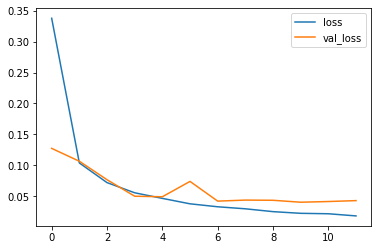

In [8]:
history_printer(r, 'loss')

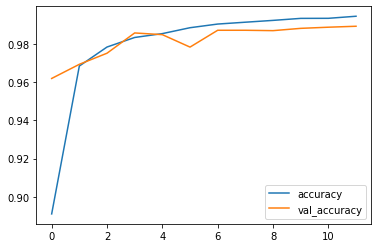

In [10]:
history_printer(r, 'accuracy')

# Looking at some wrong predictions

In [17]:
predictions = model.predict(X_test).argmax(axis = 1)
wrong = np.where(predictions != y_test)[0]

Text(0.5, 1.0, '7 predicted as 1')

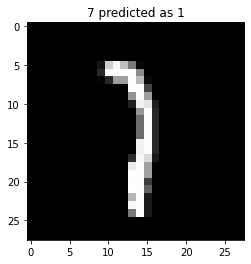

In [24]:
wrong_choice = np.random.choice(wrong)

plt.imshow(X_test[wrong_choice], cmap = 'gray')
plt.title(f'{y_test[wrong_choice]} predicted as {predictions[wrong_choice]}')